In [9]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 14.2 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 9.5 MB/s eta 0:00:00a 0:00:01
  Created wheel for peewee: filename=peewee-3.18.1-cp312-cp312-macosx_11_0_arm64.whl size=264309 sha256=2d7abad1c970b247ca8a37627e66ad95f120f10f78f0d10c600de66331135581
  Stored in directory: /Users/vithushanesan/Library/Caches/pip/wheels/1a/57/6a/bb71346381d0d911cd4ce3026f1fa720da76707e4f01cf27dd
Successfully built peewee


In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
Goal: Create a stock portfolio and track historical value at risk 

In [16]:
# Step 1: Pick stocks 
# Step 2: Get daily returns (closing prices)
# Step 3: Create stock portfolio by assigning weights
# Step 4: Create daily return of portfolio 
# Step 5: Sort the return values, and fine VaR at 95% (also 5th percentile of worst returns) 

In [220]:
# Step 1: Pick stocks 

# Ultra short etf, Gold Buillion etf, TSX etf and s&p 500 etfs

# Download data
# ticker = ['ZST.TO','CGL.TO','XIU.TO','VFV.TO']
ticker = ["TD.TO", "PLTR", "XIU.TO", 'VFV.TO']
data = yf.download(ticker, start = "2023-01-01", end = "2025-07-01")

data['Close'].head()


/var/folders/t4/plfsv80s1_32zcrl30pvj2kh0000gn/T/ipykernel_16775/4000479300.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start = "2023-01-01", end = "2025-07-01")
[*********************100%***********************]  4 of 4 completed


Ticker      PLTR      TD.TO     VFV.TO     XIU.TO
Date                                             
2023-01-03  6.39  77.514030  90.108757  27.486254
2023-01-04  6.58  78.521965  89.564774  27.671164
2023-01-05  6.32  77.234879  89.040207  27.578711
2023-01-06  6.40  77.199120  90.157341  28.022484
2023-01-09  6.50  76.957787  89.768784  28.068712

In [224]:
data2 = data.copy()

In [226]:
# Assigning weights to each security in the portfolio
# weights = {
#     'CGL.TO' : 0.25, 
#     'VFV.TO' : 0.25,
#     'XIU.TO' : 0.25, 
#     'ZST.TO' : 0.25 
# }

weights = {
    'PLTR' : 0.25, 
    'TD.TO' : 0.25,
    'XIU.TO' : 0.25, 
    'VFV.TO' : 0.25 
}

closing_prices = data2['Close'][list(weights.keys())]


# Calculating Daily return (pct change calculates % changes from previous day)
daily_returns = closing_prices.pct_change()

# portfolio daily return (weighted sum), dot does matrix muliplication for each day, mulitplies each return by its weight and sums it
portfolio_returns = daily_returns.dot(list(weights.values()))

portfolio_returns.name = 'Portfolio Daily return'


/var/folders/t4/plfsv80s1_32zcrl30pvj2kh0000gn/T/ipykernel_16775/1164288229.py:20: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = closing_prices.pct_change()


In [228]:
# converting to dataframe

portfolio_returns_df = portfolio_returns.to_frame(name='Daily Return')
portfolio_returns_df.head()

Daily Return
Date                    
2023-01-03           NaN
2023-01-04      0.010857
2023-01-05     -0.016276
2023-01-06      0.010208
2023-01-09      0.002460

In [230]:
# First, create a cumulative return series 

portfolio_returns_df['Cumulative Return'] = (1 + portfolio_returns_df['Daily Return']).cumprod()

# Secondly, apply initital investment to see how portfolio grows over time 
initial_investment = 10000

portfolio_returns_df['Portfolio Value'] = portfolio_returns_df['Cumulative Return']*initial_investment

In [232]:
portfolio_returns_df = portfolio_returns_df.reset_index()
portfolio_returns_df

Date  Daily Return  Cumulative Return  Portfolio Value
0   2023-01-03           NaN                NaN              NaN
1   2023-01-04      0.010857           1.010857     10108.569032
2   2023-01-05     -0.016276           0.994404      9944.044406
3   2023-01-06      0.010208           1.004556     10045.555149
4   2023-01-09      0.002460           1.007026     10070.264185
..         ...           ...                ...              ...
633 2025-06-24      0.012045           3.193152     31931.522003
634 2025-06-25     -0.001707           3.187702     31877.024710
635 2025-06-26      0.006073           3.207062     32070.623373
636 2025-06-27     -0.021433           3.138324     31383.242082
637 2025-06-30      0.013784           3.181584     31815.835118

[638 rows x 4 columns]

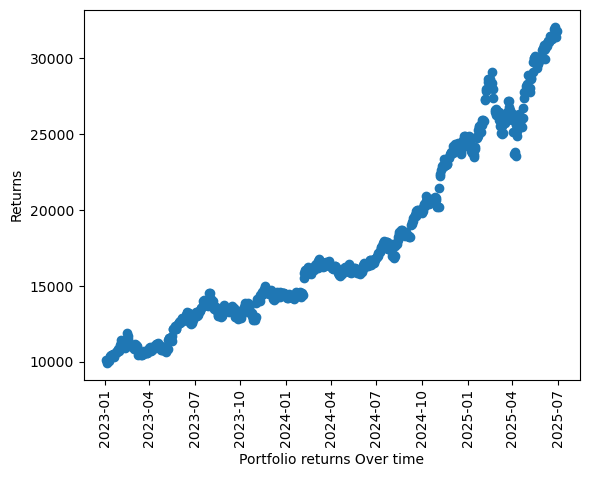

In [234]:
plt.scatter(portfolio_returns_df["Date"], portfolio_returns_df['Portfolio Value'])
plt.xlabel('Portfolio returns Over time')
plt.xticks(rotation=90)
plt.ylabel('Returns')
plt.show()
